In [28]:
from utils import list_change
import pandas as pd
import numpy as np
import glob
from keras import Sequential
from keras.layers import LSTM, Dense
import copy
import matplotlib.pyplot as plt
from utils import split_dataset, restore_changes
import os
import tensorflow as tf
import cv2

In [29]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')
# print(tf.__version__)
# tf.test.is_gpu_available()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [30]:
# def formating(X, Y):
#     x_test = []
#     y_test = []
#     for x, y in zip(X, Y):
#         x_test+=x[0].tolist()
#         y_test+=y[0].tolist()
#     return np.array(x_test), np.array(y_test)
def formating(X, Y):
    x_test = []
    y_test = []
    for x, y in zip(X, Y):
        x_test+=x.tolist()
        y_test+=y.tolist()
    return np.array(x_test), np.array(y_test)

In [31]:
files = glob.glob('CutFrame_Output/output*/use2.txt')
data = [list_change(f) for f in files]

In [32]:
data=[]
for _dir in glob.glob('CutFrame_Output/output*/'):
    data.append([list_change(f) for f in glob.glob(_dir+'use*.txt')])
data = np.array(data)

In [33]:
len(data)

149

In [34]:
data[0]

array([[[  35.,   65.],
        [ 125.,  -58.],
        [-181.,  455.]],

       [[-161.,  110.],
        [ -48.,   31.],
        [-189.,  480.]],

       [[-168.,  151.],
        [-246.,  190.],
        [-121.,  457.]],

       [[ -73.,  145.],
        [-171.,  208.],
        [ -34.,  359.]],

       [[ -40.,  162.],
        [ -57.,  190.],
        [ -20.,  297.]],

       [[-146.,  161.],
        [-283.,  234.],
        [ -52.,  392.]],

       [[-156.,  114.],
        [ -54.,    7.],
        [-123.,  429.]]])

In [35]:
# dataf = [pd.DataFrame(i,copy=True) for i in data]
# dataf

In [36]:
X = copy.deepcopy(data)
Y = copy.deepcopy(data)
X = np.delete(X, -1, axis=1)
Y = np.delete(Y, 0, axis=1)

In [37]:
Y.shape

(149, 6, 3, 2)

In [38]:
X, X_val, X_test, Y, Y_val, Y_test = split_dataset(X, Y)
# X_test, Y_test = formating(X_test, Y_test)
X_test=X_test[0]
Y_test=Y_test[0]

In [39]:
index = 0
points = restore_changes(X[index],index,None)
# points = ['pass']+points
# del(points[-1])
for n,f in enumerate(points):
    # if n==0:
    #     continue0
    img = cv2.imread(f'./CutFrame_Output/output{index}/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/ori/output{n}.png', img)

In [40]:
X_test.shape

(6, 3, 2)

### test

In [41]:
X = np.array([X[0]])
Y = np.array([Y[0]])
X_test = X[0]
Y_test = Y[0]

In [42]:
l=[]
l0=[]
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X.shape[2], X.shape[3])))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
# history = model.fit(X, Y, epochs=100, batch_size=72, validation_data=(X, Y), verbose=1, shuffle=False)
minimum_loss = float('inf')
for epoch in range(2000):
    for x, y in zip(X, Y):
        loss = model.train_on_batch(x, y)
        l.append(loss)
    print(epoch,end=': ')
    l0.append(model.evaluate(X_test, Y_test))
    if l0[-1] < minimum_loss:
            minimum_loss = l0[-1]
            model.save('best.h5')

1/1 [==============================] - 0s 39ms/step - loss: 0.5414


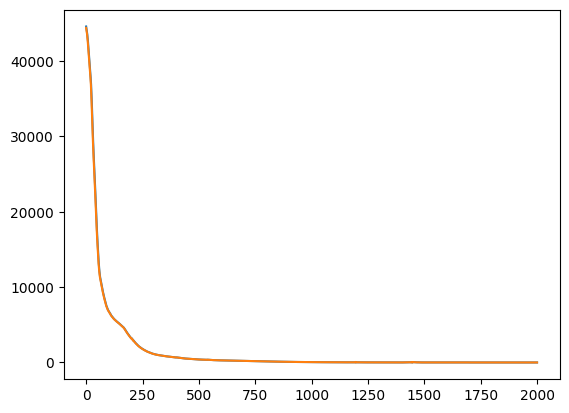

In [43]:
plt.plot(l)
plt.plot(l0)
plt.show()

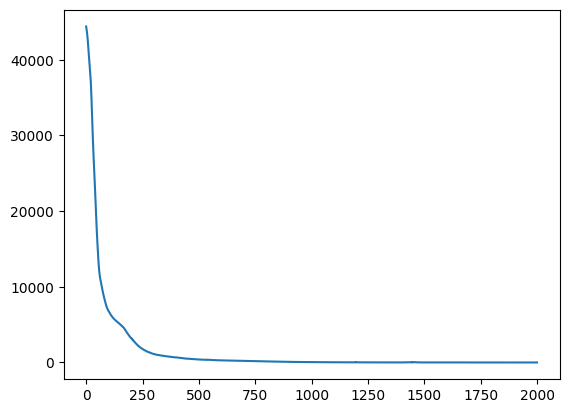

In [44]:
plt.plot(l0)

In [45]:
print(f'best epoch: {min(l0)}',f'best batch: {min(l)}')

best epoch: 0.5414212942123413 best batch: 0.5440357327461243


In [46]:
l0[-1]

0.5414212942123413

In [57]:
model.save('last.h5')

In [58]:
data[0]

array([[[  35.,   65.],
        [ 125.,  -58.],
        [-181.,  455.]],

       [[-161.,  110.],
        [ -48.,   31.],
        [-189.,  480.]],

       [[-168.,  151.],
        [-246.,  190.],
        [-121.,  457.]],

       [[ -73.,  145.],
        [-171.,  208.],
        [ -34.,  359.]],

       [[ -40.,  162.],
        [ -57.,  190.],
        [ -20.,  297.]],

       [[-146.,  161.],
        [-283.,  234.],
        [ -52.,  392.]],

       [[-156.,  114.],
        [ -54.,    7.],
        [-123.,  429.]]])

In [59]:
restore_changes(data[0],0,None)

[[[828.0, 635.0], [918.0, 512.0], [612.0, 1025.0]],
 [[625.0, 676.0], [738.0, 597.0], [597.0, 1046.0]],
 [[518.0, 740.0], [440.0, 779.0], [565.0, 1046.0]],
 [[488.0, 821.0], [390.0, 884.0], [527.0, 1035.0]],
 [[488.0, 880.0], [471.0, 908.0], [508.0, 1015.0]],
 [[449.0, 817.0], [312.0, 890.0], [543.0, 1048.0]],
 [[558.0, 689.0], [660.0, 582.0], [591.0, 1004.0]]]

In [60]:
# import cv2
# img=cv2.imread('CutFrame_Output/output0/frame_0.png')
# from utils import process_data
# import re
# from utils import list_change
# 
# data = process_data(r'CutFrame_Output/output0/use0.txt')
# data1 = list_change(r'CutFrame_Output/output0/use0.txt')
# print(data)
# print(data1)
# for p in data:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
# 
# for p in data1:
#     # print((p[0], p[1]))
#     cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 0, 255), -1)
# 
# cv2.imwrite('output.png', img)

In [61]:
# restore_changes(data[0],0)

In [62]:
model = tf.keras.models.load_model('best.h5')
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 177ms/step - loss: 0.5414


0.5414212942123413

In [63]:
a= model.predict(data[0]).tolist()

1/1 [==============================] - 0s 132ms/step


In [64]:
a[0]

[[-161.1954803466797, 109.95111846923828],
 [-47.995399475097656, 31.002025604248047],
 [-188.98052978515625, 480.0024719238281]]

In [65]:
data[0]

array([[[  35.,   65.],
        [ 125.,  -58.],
        [-181.,  455.]],

       [[-161.,  110.],
        [ -48.,   31.],
        [-189.,  480.]],

       [[-168.,  151.],
        [-246.,  190.],
        [-121.,  457.]],

       [[ -73.,  145.],
        [-171.,  208.],
        [ -34.,  359.]],

       [[ -40.,  162.],
        [ -57.,  190.],
        [ -20.,  297.]],

       [[-146.,  161.],
        [-283.,  234.],
        [ -52.,  392.]],

       [[-156.,  114.],
        [ -54.,    7.],
        [-123.,  429.]]])

In [66]:
points = restore_changes(a,0,None)
points = ['pass']+points
del(points[-1])
for n,f in enumerate(points):
    if n==0:
        continue
    img = cv2.imread(f'./CutFrame_Output/output0/frame_{n}.png')
    for q,p in enumerate(f):
        # print((p[0], p[1]))
        cv2.circle(img, (int(p[0]), int(p[1])), 3, (0, 255, 0), -1)
        cv2.putText(img, str(q), (int(p[0]), int(p[1])), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.imwrite(f'outputs/output{n}.png', img)